<a href="https://colab.research.google.com/github/rtomek9/DS3001Group23CHDProject/blob/main/classification%26confusion_matrixes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/DS3001/project_chd/

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 3.81 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [5]:
import pandas as pd
df = pd.read_csv('/content/project_chd/fhs_train.csv')

In [ ]:
#riley and cat cleaning

In [6]:
df.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [7]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(0)

In [8]:
df['BPMeds'] = df['BPMeds'].fillna(0)

In [9]:
df.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.902830,0.029245,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,11.993431,0.168520,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#classification?

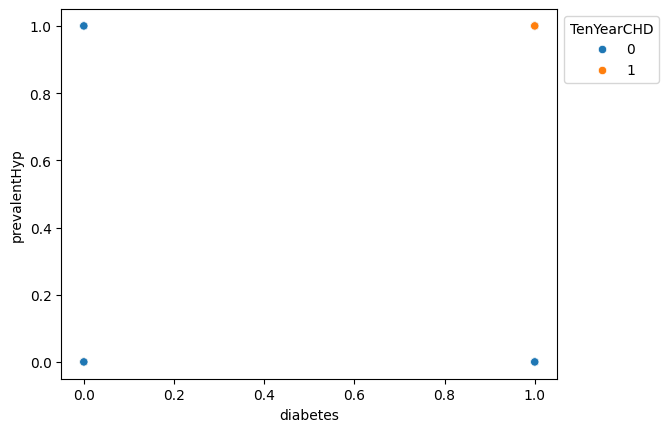

In [11]:
this_plot = sns.scatterplot(data=df,x='diabetes',y='prevalentHyp',hue='TenYearCHD')
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend

In [12]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

y = df['TenYearCHD']
X = df.loc[:,['diabetes','prevalentHyp']]

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

   diabetes  prevalentHyp
0       0.0           0.0
1       0.0           0.0
2       0.0           0.0
3       0.0           1.0
4       0.0           0.0
          diabetes  prevalentHyp
count  3180.000000   3180.000000
mean      0.026101      0.321069
std       0.159460      0.466961
min       0.000000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      1.000000
max       1.000000      1.000000


In [13]:

from sklearn.neighbors import KNeighborsClassifier

# Select features/target variable for analysis:
y = df['TenYearCHD']
X = df.loc[:,['diabetes','prevalentHyp']] # Create feature matrix

# Max-min normalize the features:
X = X.apply(maxmin)

# Fit the model:
model = KNeighborsClassifier(n_neighbors=3) # Create a sk model for k=3
classifier_model = model.fit(X,y) # Train the model on our data

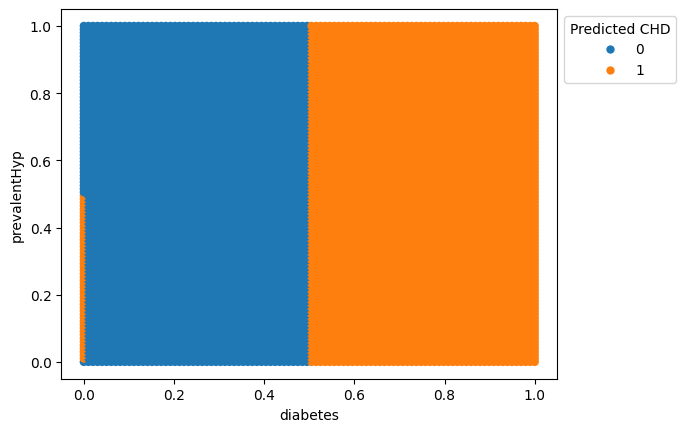

In [14]:
# Graph of predictor:
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot
grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values
xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors
x_hat = pd.DataFrame({'diabetes':X,'prevalentHyp':Y}) # Create a dataframe of points to plot
y_hat = classifier_model.predict(x_hat) # Fit the model to the points
x_hat['Predicted CHD'] = y_hat # Add new variable to the dataframe
# Create seaborn plot:
this_plot = sns.scatterplot(data=x_hat,x='diabetes',y='prevalentHyp',hue='Predicted CHD', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

In [ ]:
#confusion matrixes

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Select data:
y = df['TenYearCHD'] # Target variable
X = df.loc[:,['diabetes','prevalentHyp']] # Create feature matrix
X = X.apply(maxmin) # Normalize X

In [16]:
## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)


In [27]:
## Solve for k that maximizes accuracy:
k_bar = 100 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here
k_grid = np.arange(1,k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)


[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


In [48]:
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

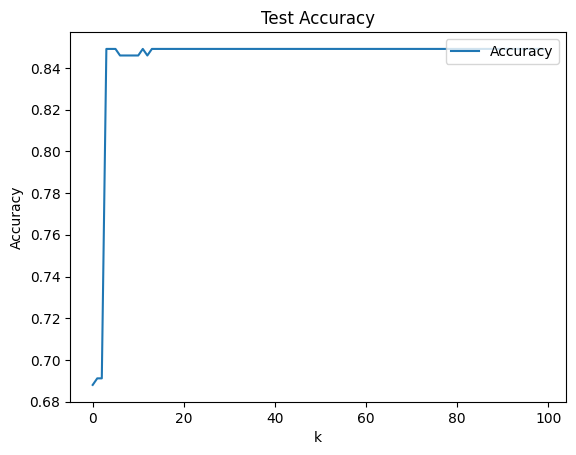

In [22]:
## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [23]:
# Confusion matrix:
pd.crosstab(y_test, y_hat)

col_0,0
TenYearCHD,
0,1350
1,240


In [19]:
## kNN Classifier sample code:
from sklearn.neighbors import KNeighborsClassifier

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# defining performance function:

def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test), dropna = False) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

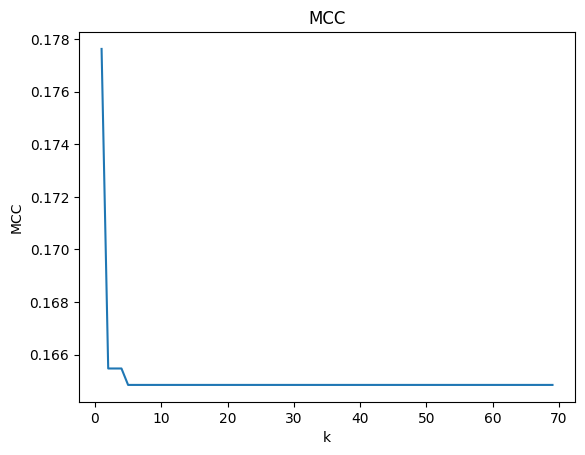

{'confusion_matrix': col_0     0    1
row_0           
0      1172  208
1        10    9, 'accuracy': 0.8441744102930665, 'specificity': 0.007614213197969543, 'sensitivity': 0.9915397631133672, 'mcc': 0.10325852105615742}


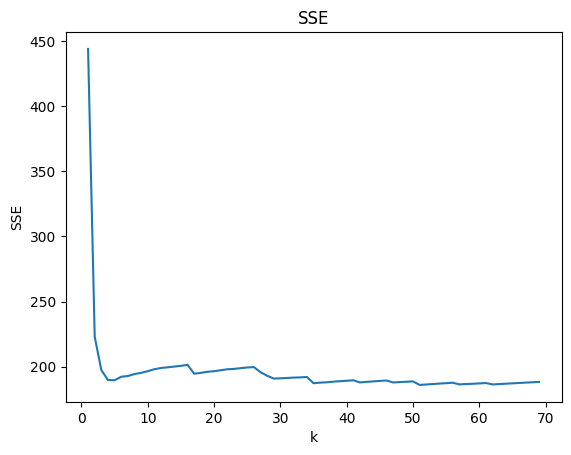

185.94963475586314


In [30]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

df = df.dropna()

# Select features/target variable for analysis:
y = df['TenYearCHD']
X = df.loc[:,['diabetes','prevalentHyp']] # Create feature matrix

# Max-min normalize the features:
X = X.apply(maxmin)

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes

# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
MCC = np.zeros(k_bar-1)
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error

for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=(k+1))
    # whenever I try to use KNeighborClassifier, it keeps giving me an error saying
    # that the index is out of bounds
    classifier_model = model.fit(X_train.values,y_train)
    y_hat = classifier_model.predict(X_test.values)
    perf = performance(y_test, y_hat)
    MCC[k] = perf['mcc']
    SSE[k] = np.sum( (y_test-y_hat)**2 )

MCC_max = np.max(MCC)
max_index = np.where(MCC==MCC_max)
k_star1 = k_grid[max_index][0]

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum


## SSE plot:
plt.plot(k_grid,MCC)
plt.xlabel("k")
plt.ylabel("MCC")
plt.title('MCC')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=np.max([3,k_star1]))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)

## Compute performance:
perf_knn = performance(y_test,y_hat_knn)
print(perf_knn)

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

print(SSE_min)